## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Load the dataset

In [2]:
url = "https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset"
# Assuming you've downloaded the dataset as "tips.csv"
tips_df = pd.read_csv("tips.csv")

### 1. Make a list of categorical and numerical columns in the data.

In [3]:
categorical_cols = ['sex', 'smoker', 'day', 'time']
numerical_cols = ['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [4]:
average_bill_per_day = tips_df.groupby('day')['total_bill'].mean()
print("Average bill amount per day:\n", average_bill_per_day)

Average bill amount per day:
 day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64


### 3. Which gender is more generous in giving tips?

In [5]:
avg_tip_by_gender = tips_df.groupby('sex')['tip'].mean()
generous_gender = avg_tip_by_gender.idxmax()
print(f"{generous_gender} tend to give more generous tips on average.")


Male tend to give more generous tips on average.


### 4. According to the data, were there more customers for dinner or lunch?

In [6]:
customer_counts = tips_df['time'].value_counts()
more_customers = customer_counts.idxmax()
print(f"There were more customers for {more_customers}.")

There were more customers for Dinner.


### 5. Based on the statistical summary, comment on the variable 'tip'

In [7]:
tip_summary = tips_df['tip'].describe()
print("Statistical summary of 'tip':\n", tip_summary)
# Comment: The average tip amount is around $3, with a minimum of $1 and a maximum of $10.


Statistical summary of 'tip':
 count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


### 6. Find the busiest day in terms of the orders?

In [8]:
busiest_day = tips_df['day'].mode().values[0]
print(f"The busiest day for orders is {busiest_day}.")


The busiest day for orders is Sat.


### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


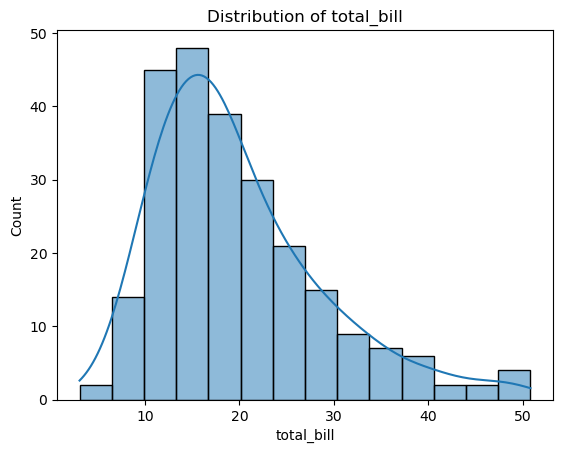

In [9]:
sns.histplot(tips_df['total_bill'], kde=True)
plt.title('Distribution of total_bill')
plt.show()

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

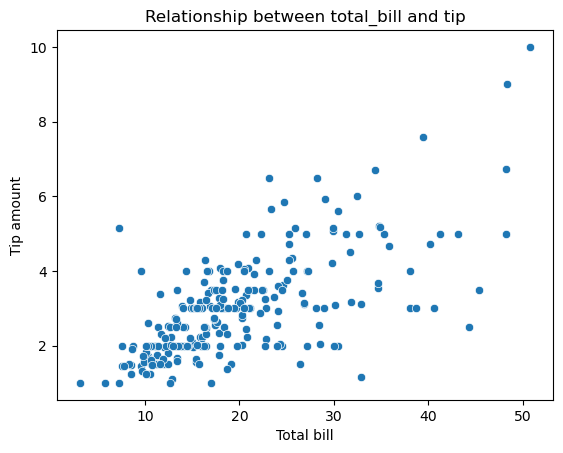

In [10]:
sns.scatterplot(x='total_bill', y='tip', data=tips_df)
plt.title('Relationship between total_bill and tip')
plt.xlabel('Total bill')
plt.ylabel('Tip amount')
plt.show()

### 9. What is the percentage of males and females in the dataset? and display it in the plot

Percentage of males and females:
 sex
Male      64.344262
Female    35.655738
Name: proportion, dtype: float64


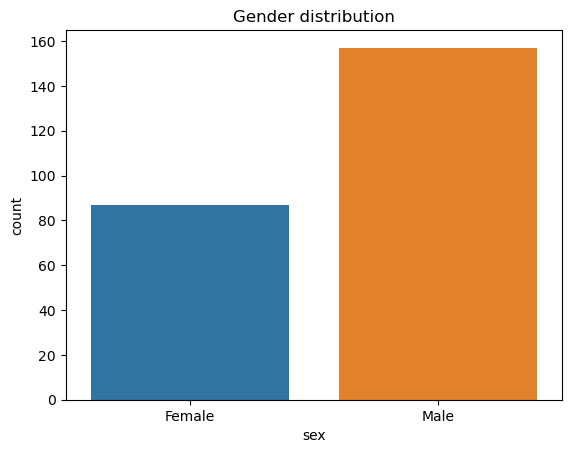

In [12]:
gender_counts = tips_df['sex'].value_counts(normalize=True) * 100
print("Percentage of males and females:\n", gender_counts)
sns.countplot(x='sex', data=tips_df)
plt.title('Gender distribution')
plt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

Gender-wise count based on smoking habits:
 smoker  No  Yes
sex            
Female  54   33
Male    97   60


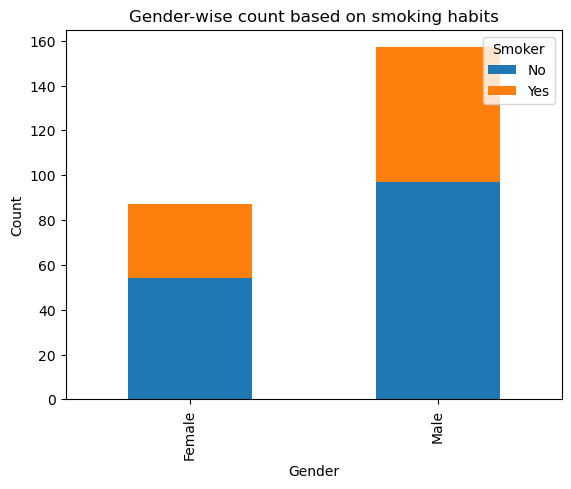

In [14]:
gender_smoker_counts = tips_df.groupby(['sex', 'smoker']).size().unstack()
print("Gender-wise count based on smoking habits:\n", gender_smoker_counts)
gender_smoker_counts.plot(kind='bar', stacked=True)
plt.title('Gender-wise count based on smoking habits')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Smoker', loc='upper right')
plt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

Average tip amount per day:
 day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64


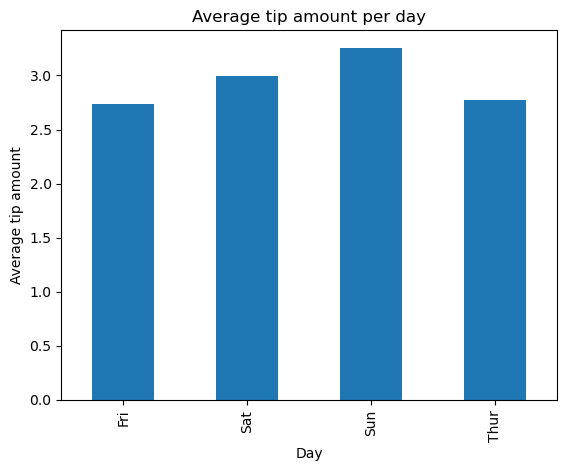

In [15]:
avg_tip_per_day = tips_df.groupby('day')['tip'].mean()
print("Average tip amount per day:\n", avg_tip_per_day)

avg_tip_per_day.plot(kind='bar')
plt.title('Average tip amount per day')
plt.xlabel('Day')
plt.ylabel('Average tip amount')
plt.show()

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

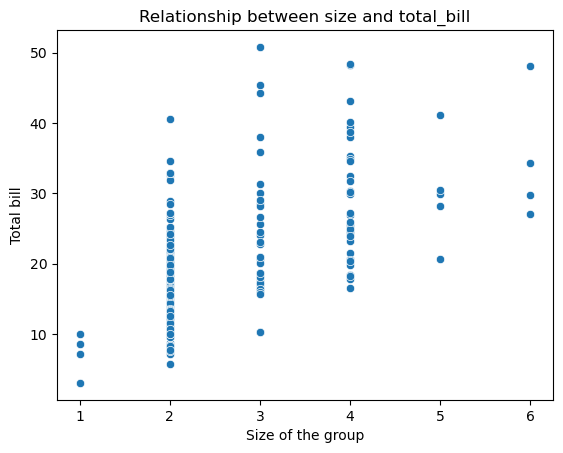

In [16]:
sns.scatterplot(x='size', y='total_bill', data=tips_df)
plt.title('Relationship between size and total_bill')
plt.xlabel('Size of the group')
plt.ylabel('Total bill')
plt.show()

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

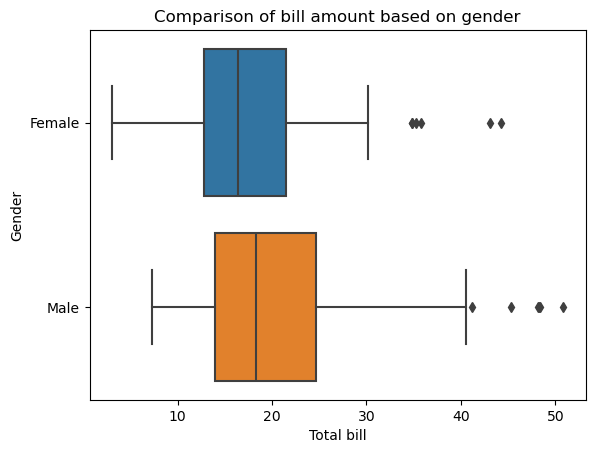

In [17]:
sns.boxplot(x='total_bill', y='sex', data=tips_df, orient='h')
plt.title('Comparison of bill amount based on gender')
plt.xlabel('Total bill')
plt.ylabel('Gender')
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [18]:
max_bills = tips_df.groupby(['day', 'time'])['total_bill'].max()
print("Maximum bill amount for lunch and dinner on Saturday and Sunday:\n", max_bills.loc[(['Sat', 'Sun'], ['Lunch', 'Dinner'])])


Maximum bill amount for lunch and dinner on Saturday and Sunday:
 day  time  
Sat  Dinner    50.81
Sun  Dinner    48.17
Name: total_bill, dtype: float64


### 15. Compute the percentage of missing values in the dataset.

In [19]:
missing_percentage = (tips_df.isnull().sum() / len(tips_df)) * 100
print("Percentage of missing values in the dataset:\n", missing_percentage)


Percentage of missing values in the dataset:
 total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64


### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [20]:
duplicate_count = tips_df.duplicated().sum()
print("Number of duplicate records:", duplicate_count)
tips_df.drop_duplicates(inplace=True)

Number of duplicate records: 1


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

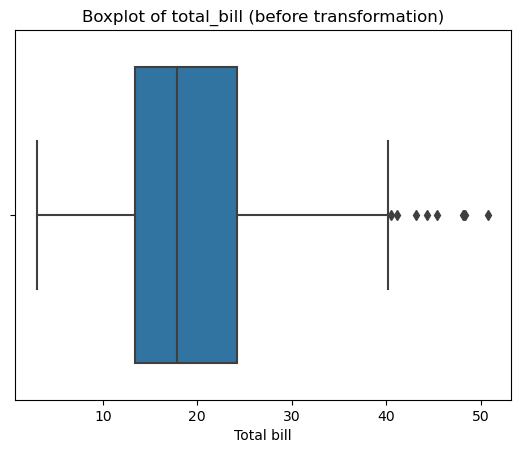

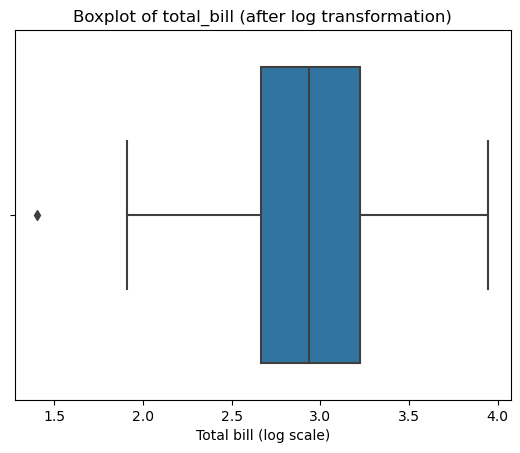

In [24]:
sns.boxplot(x=tips_df['total_bill'])
plt.title('Boxplot of total_bill (before transformation)')
plt.xlabel('Total bill')
plt.show()

# Applying log transformation to 'total_bill'
tips_df['total_bill'] = np.log1p(tips_df['total_bill'])

sns.boxplot(x=tips_df['total_bill'])
plt.title('Boxplot of total_bill (after log transformation)')
plt.xlabel('Total bill (log scale)')
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

In [25]:
Q1 = tips_df['tip'].quantile(0.25)
Q3 = tips_df['tip'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

tips_df = tips_df[(tips_df['tip'] >= lower_bound) & (tips_df['tip'] <= upper_bound)]


### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [26]:
encoded_tips_df = pd.get_dummies(tips_df, columns=categorical_cols, drop_first=True)
print("Random 5 samples from the encoded dataframe:\n", encoded_tips_df.sample(5))


Random 5 samples from the encoded dataframe:
      total_bill   tip  size  sex_Male  smoker_Yes  day_Sat  day_Sun  day_Thur  \
57     3.310908  1.50     2     False       False     True    False     False   
155    3.429137  5.14     5     False       False    False     True     False   
158    2.666534  2.61     2     False       False    False     True     False   
70     2.566487  1.97     2      True       False     True    False     False   
173    3.491952  3.18     2      True        True    False     True     False   

     time_Lunch  
57        False  
155       False  
158       False  
70        False  
173       False  


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [27]:
total_bill_range = tips_df['total_bill'].max() - tips_df['total_bill'].min()
tips_df['total_bill'] = (tips_df['total_bill'] - tips_df['total_bill'].min()) / total_bill_range


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [29]:
tips_df = pd.read_csv("tips.csv")
encoded_tips_df = pd.get_dummies(tips_df, columns=categorical_cols, drop_first=True)
X = encoded_tips_df.drop('tip', axis=1)
y = encoded_tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train[['total_bill', 'size']] = scaler.fit_transform(X_train[['total_bill', 'size']])
X_test[['total_bill', 'size']] = scaler.transform(X_test[['total_bill', 'size']])


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared value of the prediction on the test data:", r2)

R-squared value of the prediction on the test data: 0.2930966744126742


### Happy Learning:)